In [1]:
library(tidyverse)
library(readr)
library(repr)
library(tidyr)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'readr' was built under R version 4.0.5"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
total_data = read_csv('https://health-infobase.canada.ca/src/data/covidLive/covid19-download.csv')

head(total_data)


-- Column specification --------------------------------------------------------
cols(
  .default = col_double(),
  prname = col_character(),
  prnameFR = col_character(),
  date = col_date(format = ""),
  update = col_logical(),
  percentrecover = col_character()
)
i Use `spec()` for the full column specifications.




pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,...,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
<dbl>,<chr>,<chr>,<date>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
35,Ontario,Ontario,2020-01-31,NA,3,0,0,3,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
59,British Columbia,Colombie-Britannique,2020-01-31,NA,1,0,0,1,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,Canada,Canada,2020-01-31,NA,4,0,0,4,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
35,Ontario,Ontario,2020-02-08,NA,3,0,0,3,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
59,British Columbia,Colombie-Britannique,2020-02-08,NA,4,0,0,4,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,Canada,Canada,2020-02-08,NA,7,0,0,7,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [3]:
# extracting only data for ontario
ontario_data <- total_data %>%
    select(prname, date, numconf) %>%
    filter(prname == "Ontario")

head(ontario_data)

prname,date,numconf
<chr>,<date>,<dbl>
Ontario,2020-01-31,3
Ontario,2020-02-08,3
Ontario,2020-02-16,3
Ontario,2020-02-21,3
Ontario,2020-02-24,4
Ontario,2020-02-25,4


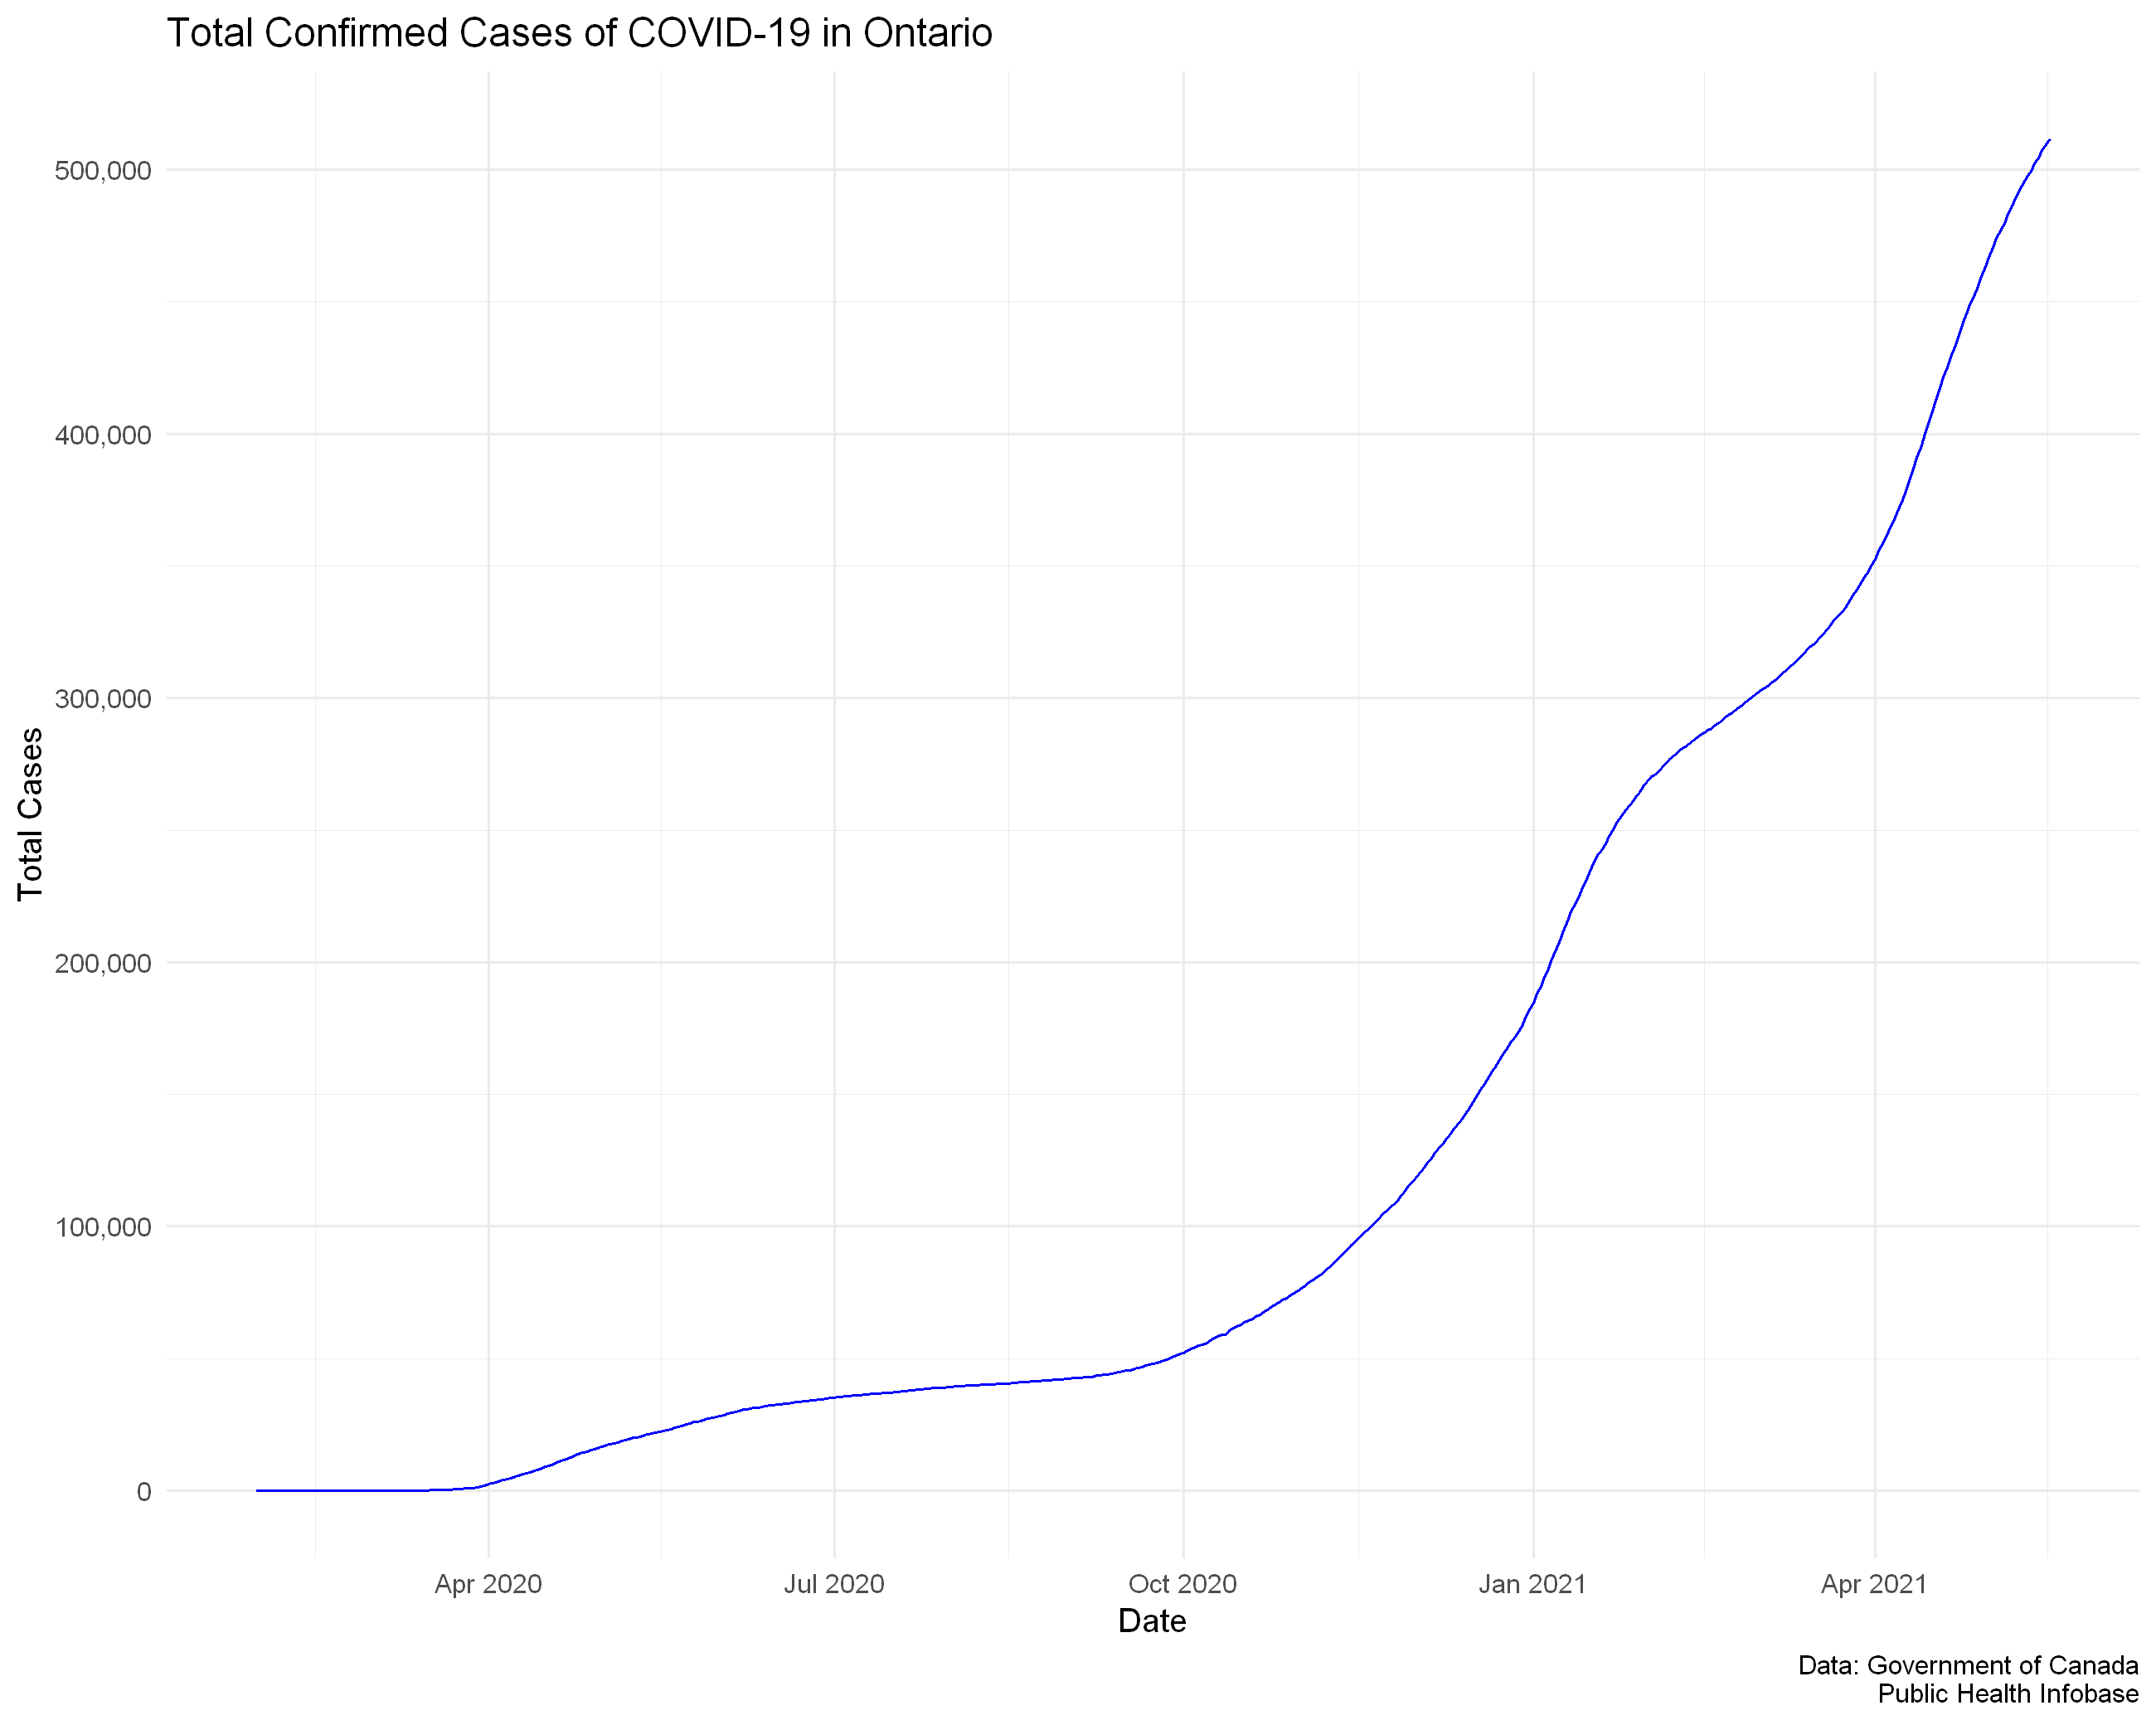

In [4]:
# plotting
options(repr.plot.width = 10, repr.plot.height = 8, repr.plot.res=260)

ggplot(ontario_data, mapping = aes(x = date, y = numconf)) + 
    geom_line(color='blue') + 
    scale_y_continuous(labels = scales::comma) + 
    labs(title='Total Confirmed Cases of COVID-19 in Ontario', x='Date', 
         y='Total Cases', caption='Data: Government of Canada\nPublic Health Infobase') + 
    theme_minimal()

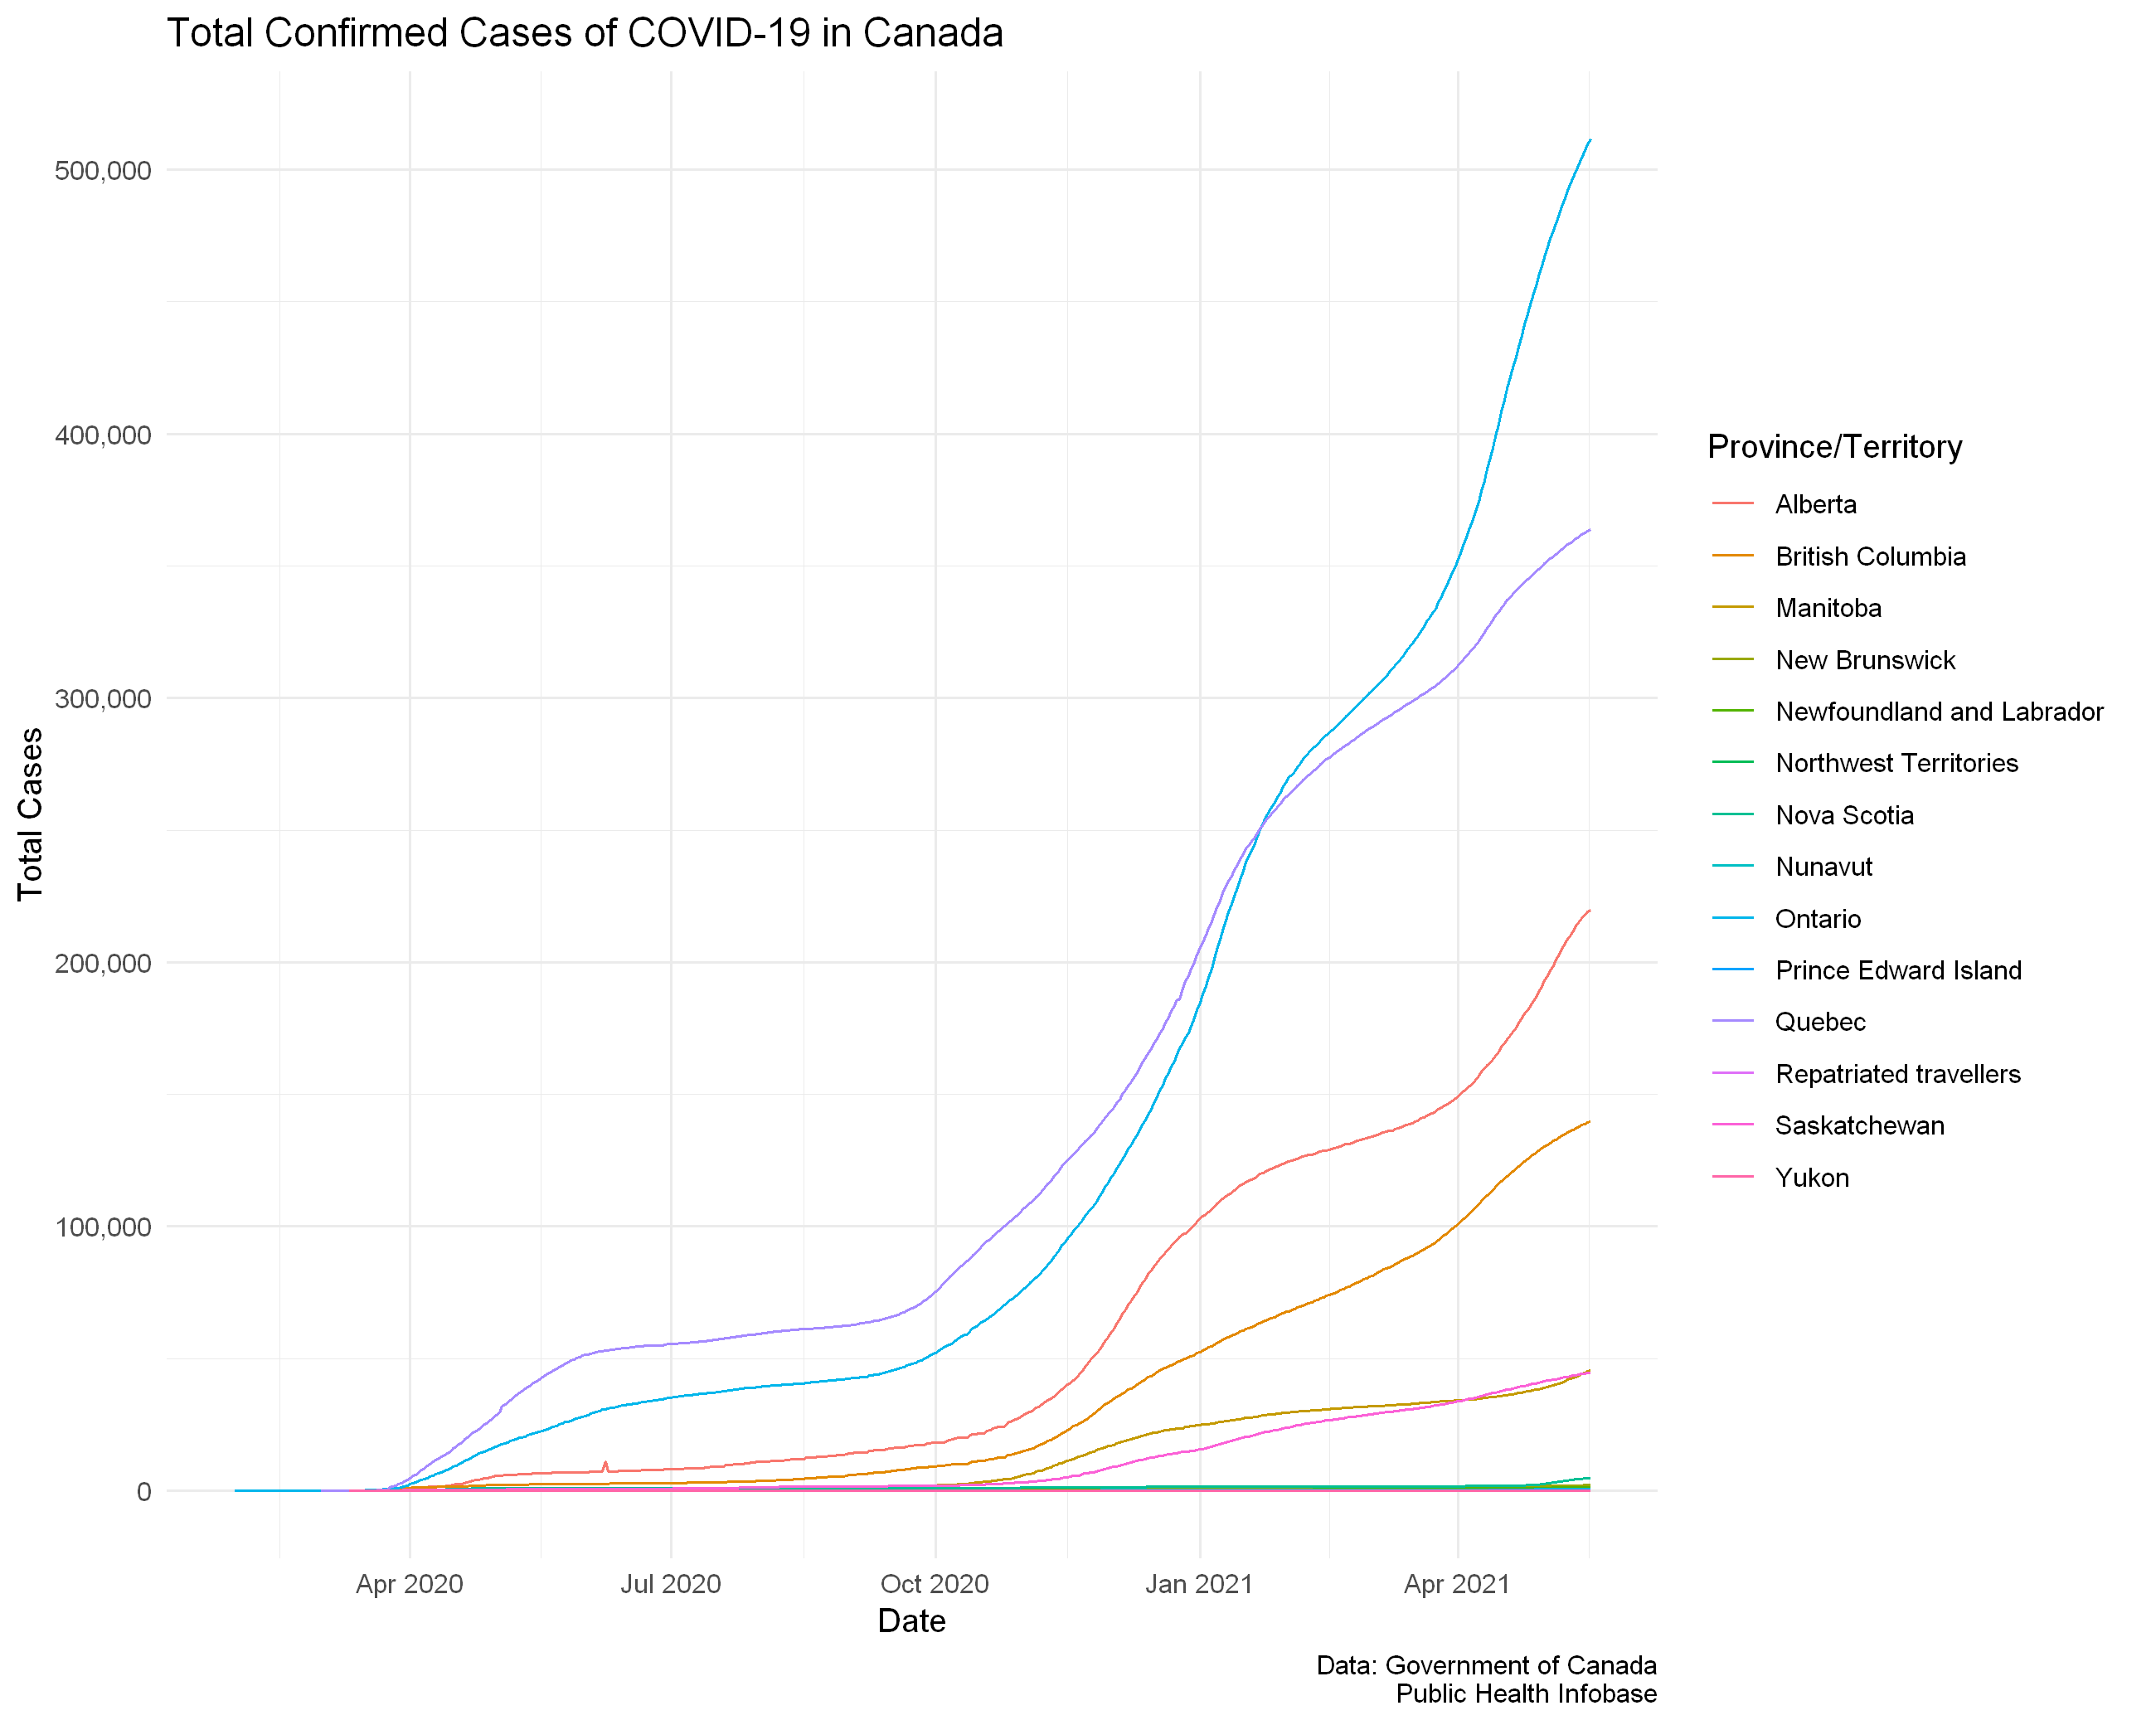

In [5]:
# extracting data on all provinces/territories
province_data <- total_data %>%
    select(prname, date, numconf) %>%
    filter(prname != 'Repatriated Travellers', prname != 'Canada')

# plotting
ggplot(province_data, mapping = aes(x = date, y = numconf, color = prname)) + 
    geom_line() +
    scale_y_continuous(labels = scales::comma) + 
    labs(title='Total Confirmed Cases of COVID-19 in Canada', x='Date', 
         y='Total Cases', caption='Data: Government of Canada\nPublic Health Infobase',
         color='Province/Territory') + 
    theme_minimal()

In [6]:
# hospital data
ontario_data2_raw = read_csv('https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/ed270bb8-340b-41f9-a7c6-e8ef587e6d11/download/covidtesting.csv')


-- Column specification --------------------------------------------------------
cols(
  .default = col_double(),
  `Reported Date` = col_date(format = "")
)
i Use `spec()` for the full column specifications.




In [7]:
# putting data into tidy format
ontario_data2 <- ontario_data2_raw %>%
    select('Reported Date',
           'Number of patients hospitalized with COVID-19',
           'Number of patients in ICU due to COVID-19',
           'Number of patients in ICU on a ventilator due to COVID-19') %>%
    rename(date = 'Reported Date',
           'In Hospital' = 'Number of patients hospitalized with COVID-19',
           'In ICU' = 'Number of patients in ICU due to COVID-19',
           'In ICU on Ventilator' = 'Number of patients in ICU on a ventilator due to COVID-19') %>%
    pivot_longer(-date, names_to = 'patient_type', values_to = 'count') %>%
    drop_na()

# checking formatting
head(ontario_data2)

date,patient_type,count
<date>,<chr>,<dbl>
2020-04-02,In Hospital,405
2020-04-03,In Hospital,462
2020-04-04,In Hospital,506
2020-04-05,In Hospital,523
2020-04-06,In Hospital,589
2020-04-07,In Hospital,614


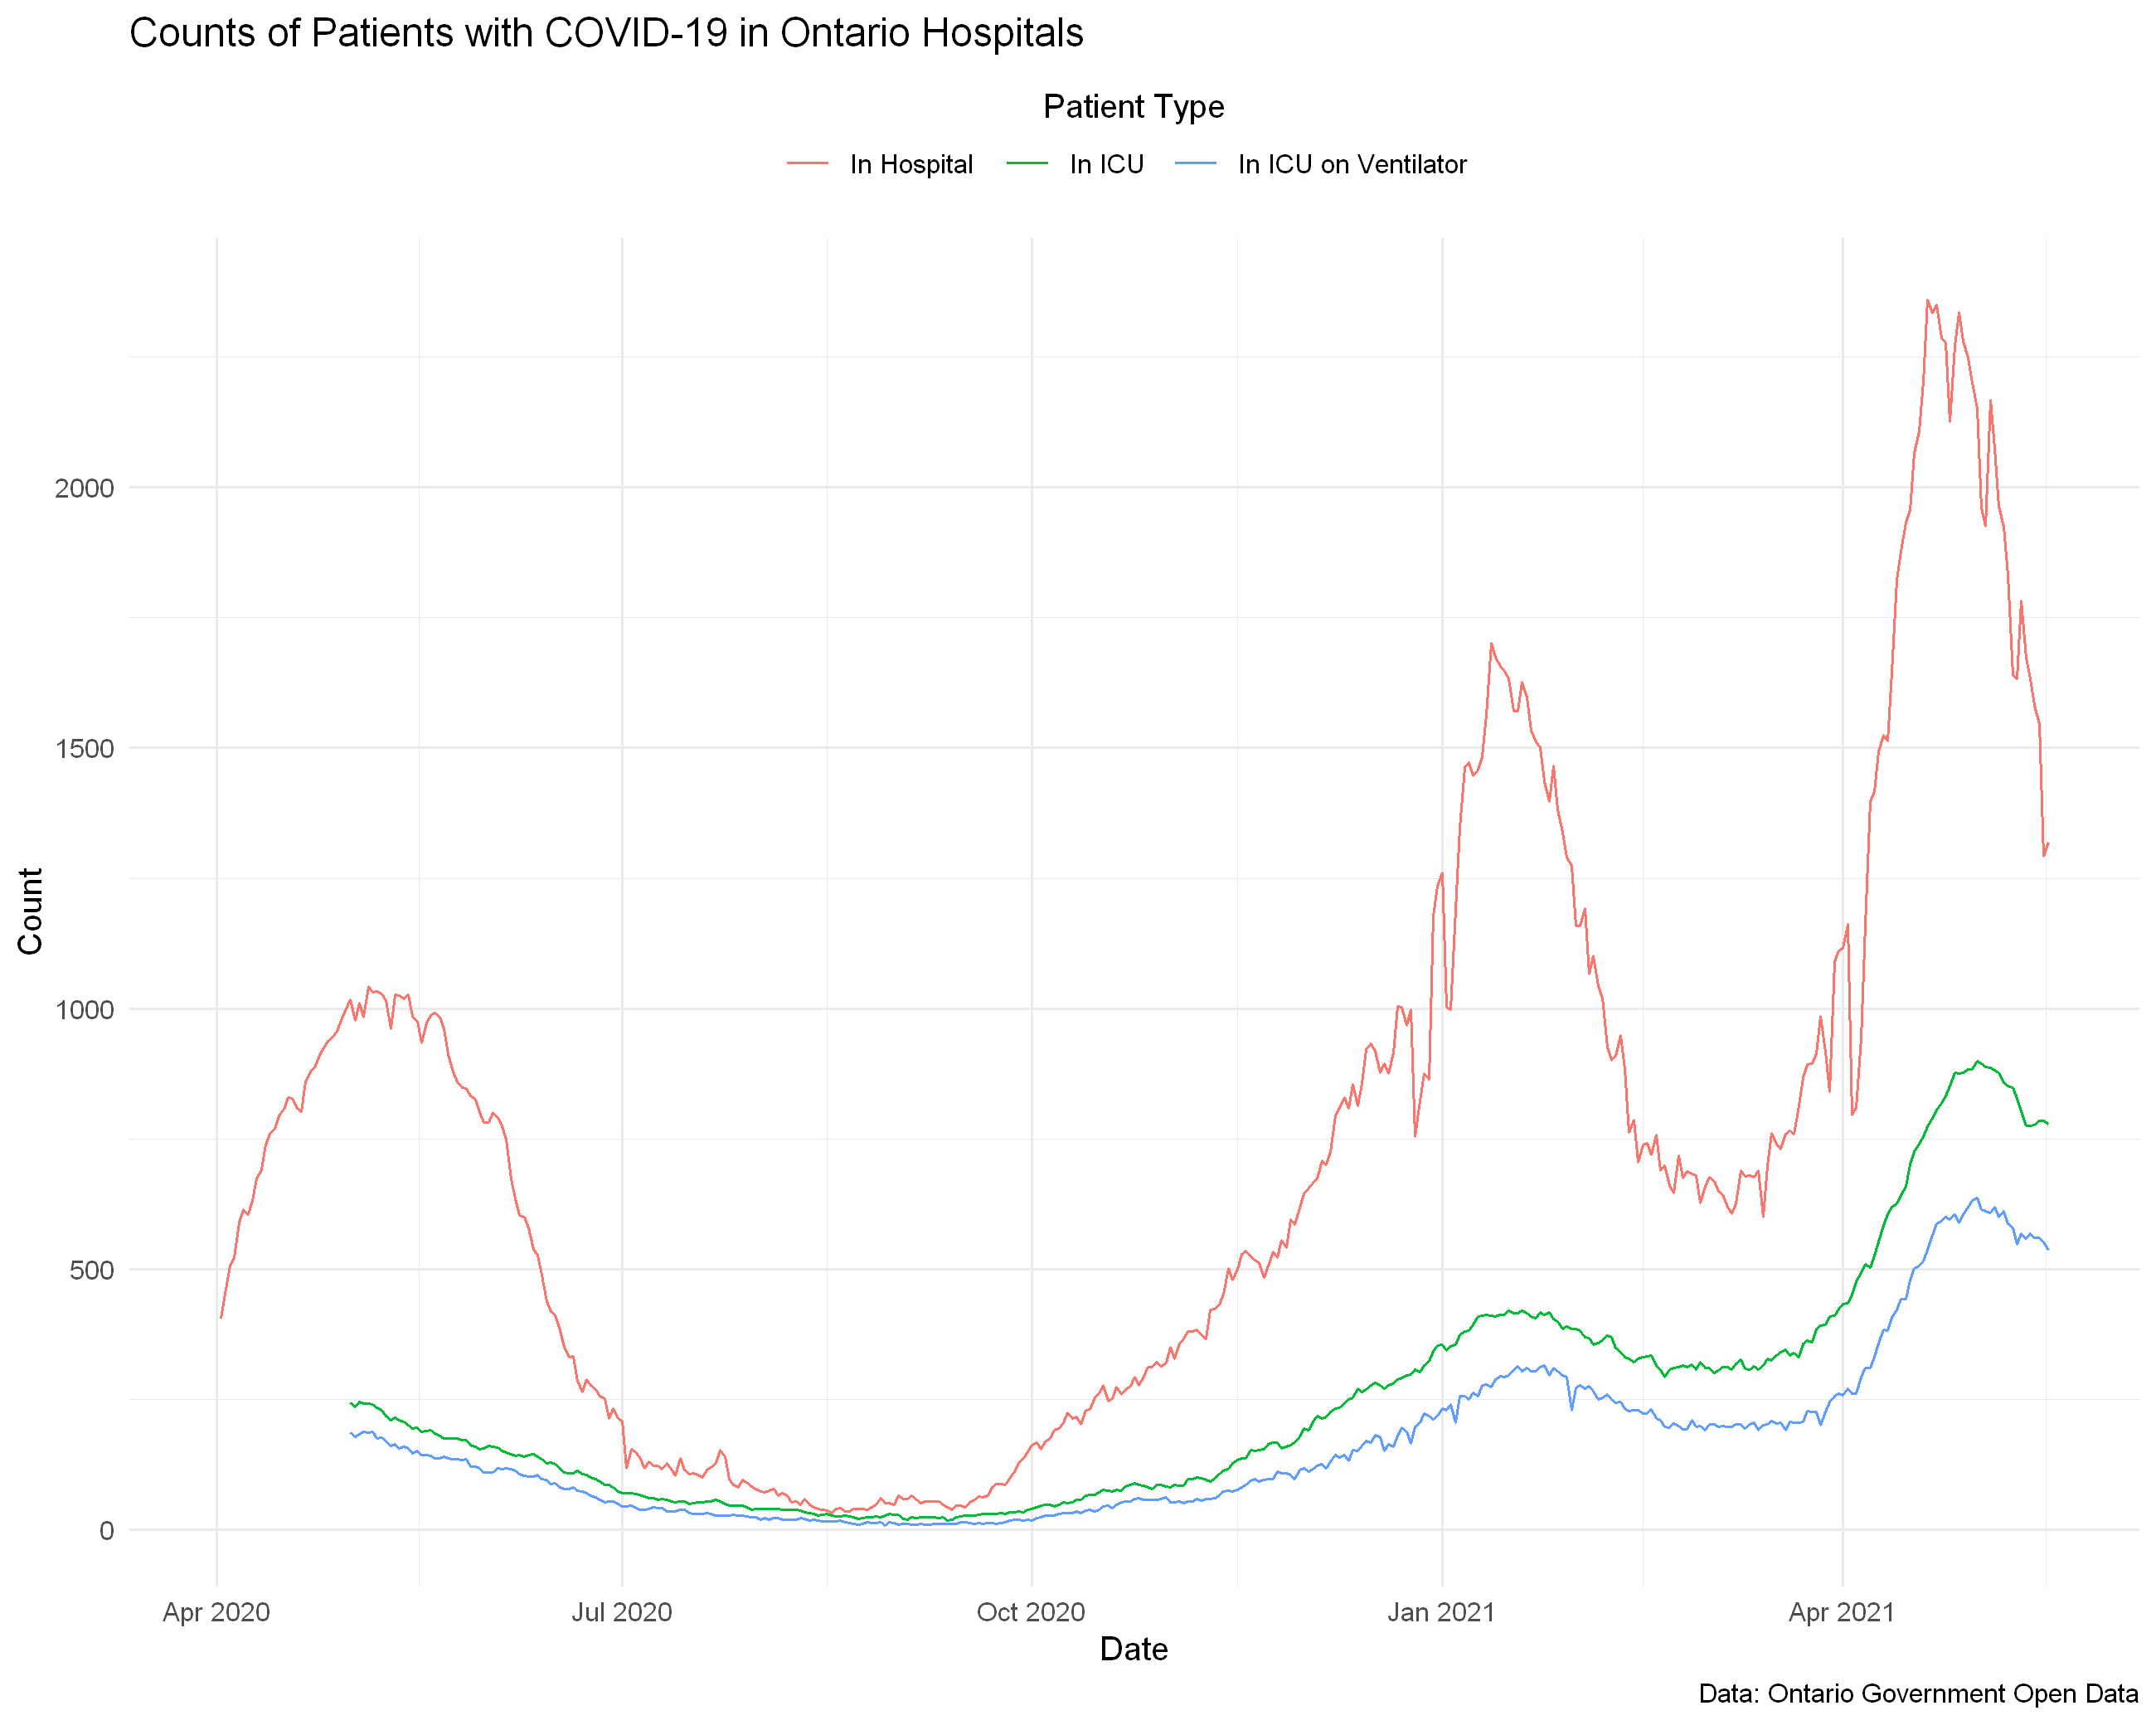

In [8]:
# plotting
ggplot(ontario_data2, aes(x = date, y = count, color = patient_type)) + 
    geom_line() + 
    labs(title = 'Counts of Patients with COVID-19 in Ontario Hospitals', 
         caption = 'Data: Ontario Government Open Data', 
         x = 'Date', 
         y = 'Count',
         color = 'Patient Type') + 
    theme_minimal() + 
    theme(legend.position = 'top') +
    guides(color = guide_legend(title.position = 'top', title.hjust = 0.5))

In [9]:
# vaccine data
vaccine_data_raw <- read_csv('https://data.ontario.ca/dataset/752ce2b7-c15a-4965-a3dc-397bf405e7cc/resource/8a89caa9-511c-4568-af89-7f2174b4378c/download/vaccine_doses.csv')

head(vaccine_data_raw)


-- Column specification --------------------------------------------------------
cols(
  report_date = col_date(format = ""),
  previous_day_doses_administered = col_double(),
  total_doses_administered = col_double(),
  total_doses_in_fully_vaccinated_individuals = col_double(),
  total_individuals_fully_vaccinated = col_double()
)




report_date,previous_day_doses_administered,total_doses_administered,total_doses_in_fully_vaccinated_individuals,total_individuals_fully_vaccinated
<date>,<dbl>,<dbl>,<dbl>,<dbl>
2020-12-24,NA,10756,NA,NA
2020-12-30,4595,18603,NA,NA
2020-12-31,5463,23502,NA,NA
2021-01-01,5415,28887,NA,NA
2021-01-02,4305,33191,NA,NA
2021-01-03,4361,37551,NA,NA


In [10]:
# putting data into tidy format
vaccine_data <- vaccine_data_raw %>%
    mutate('Administered to Unvaccinated' = total_doses_administered - total_doses_in_fully_vaccinated_individuals) %>%
    rename('Administered in Previous Day' = previous_day_doses_administered,
           'Total Administered' = total_doses_administered, 
           'Fully Vaccinated' = total_individuals_fully_vaccinated,
           'Administered to Fully Vaccinated' = total_doses_in_fully_vaccinated_individuals) %>%
    pivot_longer(-report_date, names_to = 'metric', values_to = 'count')

head(vaccine_data)

report_date,metric,count
<date>,<chr>,<dbl>
2020-12-24,Administered in Previous Day,NA
2020-12-24,Total Administered,10756
2020-12-24,Administered to Fully Vaccinated,NA
2020-12-24,Fully Vaccinated,NA
2020-12-24,Administered to Unvaccinated,NA
2020-12-30,Administered in Previous Day,4595


Warning message:
"Removed 16 row(s) containing missing values (geom_path)."


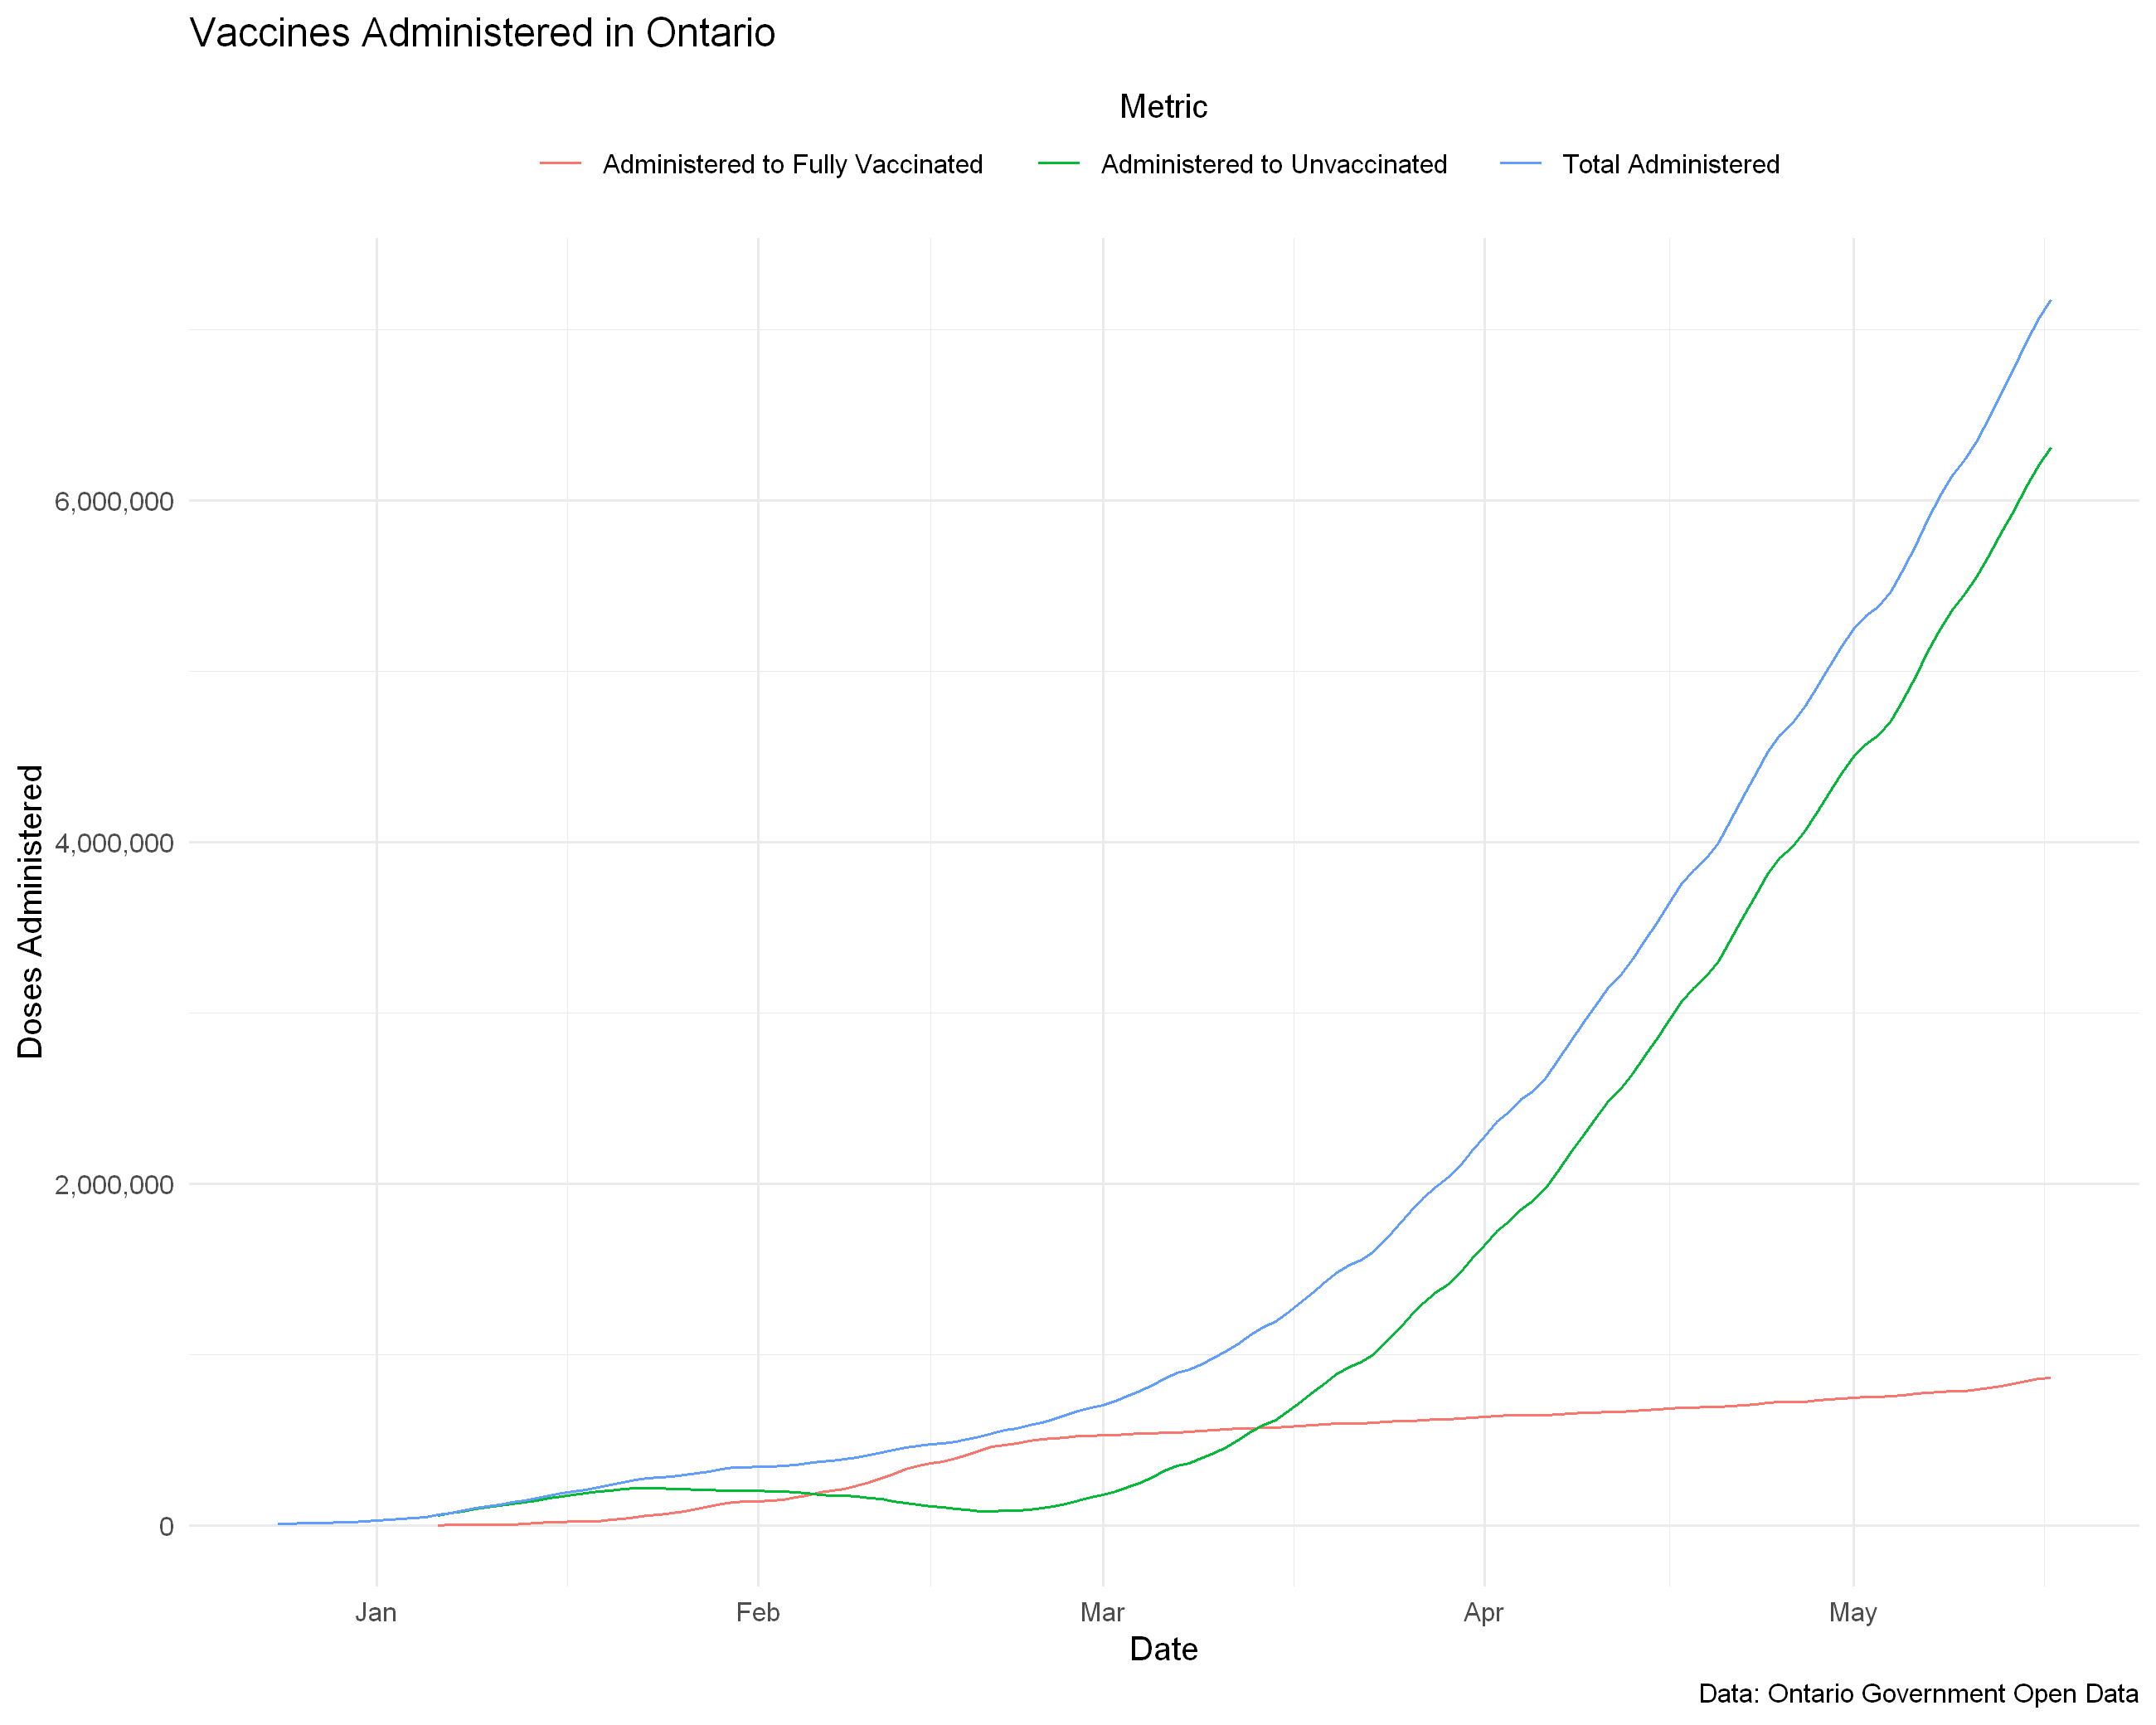

In [11]:
options(repr.plot.width = 10, repr.plot.height = 8, repr.plot.res=260)

ggplot(vaccine_data %>% filter(metric != 'Administered in Previous Day', metric != 'Fully Vaccinated'), 
       aes(x = report_date, y = count, color = metric)) + 
    geom_line() + 
    scale_y_continuous(labels = scales::comma) + 
    labs(title = 'Vaccines Administered in Ontario', 
           caption = 'Data: Ontario Government Open Data',
           x = 'Date',
           y = 'Doses Administered',
           color = 'Metric') + 
    theme_minimal() + 
    theme(legend.position = 'top') +
    guides(color = guide_legend(title.position = 'top', title.hjust = 0.5))